In [1]:
import numpy as np
import zarr
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [160]:
data = zarr.load("./mimicry_2024-06-18_15-37-35.zarr/")

In [161]:
s = data['s']
v = data['v']
d = data['d']
r = data['r']
print(f"v: {v.shape}")
print(f"d: {d.shape}")
print(f"r: {r.shape}")
print(f"s: {s.shape}")

v: (10000, 100)
d: (10000, 100, 20)
r: (10000, 100)
s: (10000, 100, 20)


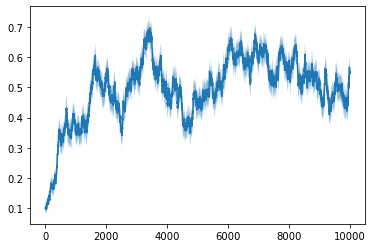

In [162]:
# Plot evolution of v
v_mean = v.mean(1)
v_std = v.std(1)
plt.plot(v_mean)
plt.fill_between(range(len(v_mean)), v_mean + v_std, v_mean - v_std, alpha = 0.5)

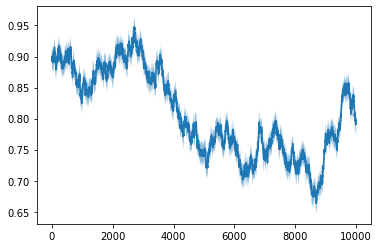

In [163]:
# Plot evolution of r
r_mean = r.mean(1)
r_std = r.std(1)
plt.plot(r_mean)
plt.fill_between(range(len(r_mean)), r_mean + r_std, r_mean - r_std, alpha = 0.5)

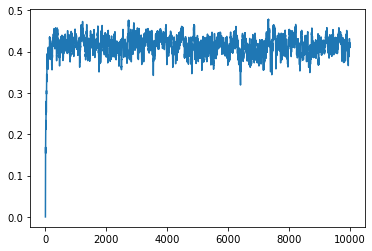

In [166]:
s_std = s.std(1).mean(1)
plt.plot(s_std)

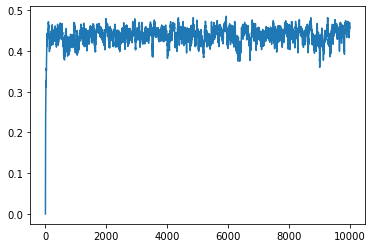

In [167]:
d_std = d.std(1).mean(1)
plt.plot(d_std)

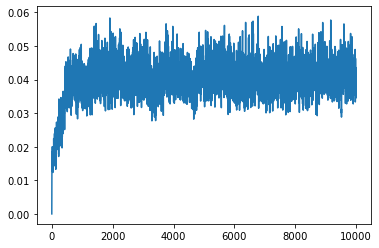

In [168]:
v_std = v.std(1)
plt.plot(v_std)

In [132]:
def similarity(s, d):
    """
    Calculate the mutual information between two bit strings or two vectors.
    Parameters:
    s: np.ndarray
        The first bit string or vector (or matrix of bit strings or vectors)
    d: np.ndarray
        The second bit string or vector (or matrix of bit strings or vectors)
    """
    if s.shape[1] != d.shape[1]:
        raise ValueError("Bit strings must have the same length.")

    assert s.ndim == d.ndim, "s and d must have the same number of dimensions."
    
    # For vectors, calculate cosine similarity
    if s.dtype == np.float16:
        return np.dot(s, d.T) / (np.linalg.norm(s) * np.linalg.norm(d, axis=1))
    # For bit strings, calculate the hamming distance and normalize
    elif s.dtype == np.int16:
        return np.sum(s == d, axis=1) / s.shape[1]
    else:
        raise ValueError("Data type not supported.")

def detector_cross_entropy(d, s, r, v):
    """
    Calculate the cross entropy of the venomosity and signals, given the detection bit strings.
    """
    S = similarity(s, d)
    A = np.exp(-S / r[:, None])
    A /= np.sum(A, axis=1, keepdims=True)
    return -np.sum(np.log(A) * v, axis=1)

In [133]:
h_mean = []
for i in range(len(d)):
    h_mean.append(detector_cross_entropy(d[i], s[i], r[i], v[i]))
h_mean = np.array(h_mean)

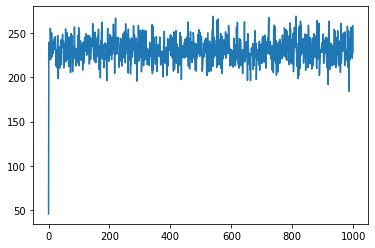

In [134]:
plt.plot(h_mean.mean(1))